In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import keras
import os

2021-11-30 16:44:01.509751: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-30 16:44:01.509780: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)


In [3]:
train_dir = '/home/vimalkumar/Documents/Classification/Train'
test_dir = '/home/vimalkumar/Documents/Classification/Test'


In [4]:
train_dataset = train.flow_from_directory(train_dir,
                                         target_size=(200,200),
                                         batch_size=8,
                                         class_mode='categorical')

test_dataset = train.flow_from_directory(test_dir,
                                         target_size=(200,200),
                                         batch_size=8,
                                         class_mode='categorical')

Found 532 images belonging to 5 classes.
Found 60 images belonging to 5 classes.


In [5]:
train_dataset.class_indices

{'Degree_certificates': 0,
 'Discharge': 1,
 'Invoice': 2,
 'License': 3,
 'Marksheet': 4}

In [6]:
test_dataset.class_indices

{'Degree_certificates': 0,
 'Discharge': 1,
 'Invoice': 2,
 'License': 3,
 'Marksheet': 4}

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',
                                                            input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                                           
                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                                           
                                    tf.keras.layers.Flatten(),
                                     
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(5,activation='softmax')]
                                                          )
                                                           
                                    

2021-11-30 16:44:08.188371: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-30 16:44:08.188407: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-30 16:44:08.188430: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (IG154): /proc/driver/nvidia/version does not exist
2021-11-30 16:44:08.188728: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [9]:
model_fit = model.fit(train_dataset,
                     #steps_per_epoch=3,
                     epochs=10,
                     validation_data=test_dataset)

2021-11-30 16:44:09.551143: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
25/67 [==========>...................] - ETA: 49s - loss: 3.6408 - accuracy: 0.2950

/home/vimalkumar/Documents/Python_new_1/cde_venv/lib/python3.8/site-packages/PIL/Image.py:2911: DecompressionBombWarning: Image size (167630848 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


42/67 [=================>............] - ETA: 38s - loss: 2.8478 - accuracy: 0.3042

/home/vimalkumar/Documents/Python_new_1/cde_venv/lib/python3.8/site-packages/PIL/Image.py:2911: DecompressionBombWarning: Image size (171400164 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


67/67 [==============================] - 105s 2s/step - loss: 2.3277 - accuracy: 0.3703 - val_loss: 0.8502 - val_accuracy: 0.6500
Epoch 2/10
67/67 [==============================] - 87s 1s/step - loss: 0.9190 - accuracy: 0.7068 - val_loss: 0.7838 - val_accuracy: 0.7667
Epoch 3/10
67/67 [==============================] - 71s 1s/step - loss: 0.4560 - accuracy: 0.8703 - val_loss: 1.0272 - val_accuracy: 0.8000
Epoch 4/10
67/67 [==============================] - 63s 937ms/step - loss: 0.3715 - accuracy: 0.8929 - val_loss: 0.8750 - val_accuracy: 0.8167
Epoch 5/10
67/67 [==============================] - 64s 954ms/step - loss: 0.2081 - accuracy: 0.9398 - val_loss: 1.3890 - val_accuracy: 0.7167
Epoch 6/10
67/67 [==============================] - 63s 931ms/step - loss: 0.4226 - accuracy: 0.9436 - val_loss: 1.7780 - val_accuracy: 0.7667
Epoch 7/10
67/67 [==============================] - 62s 929ms/step - loss: 0.1832 - accuracy: 0.9662 - val_loss: 2.0862 - val_accuracy: 0.8167
Epoch 8/10
67/67 [

In [10]:
model.save('cnn_image_model.h5')

In [11]:
from glob import glob
folders = glob('/home/vimalkumar/Documents/Classification/Train/*')
#print(folders)
print(len(folders))

5


In [12]:
keys = []
values = []
for key in range(len(folders)):
    #print(key)
    keys.append(key)
for path in os.listdir(train_dir):
    #print(path)
    values.append(path)
dic = dict(list(zip(keys,sorted(values))))
print(dic)

{0: 'Degree_certificates', 1: 'Discharge', 2: 'Invoice', 3: 'License', 4: 'Marksheet'}


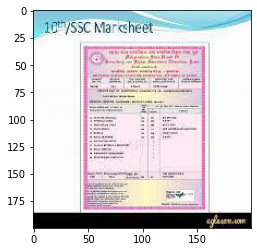

Degree_certificates


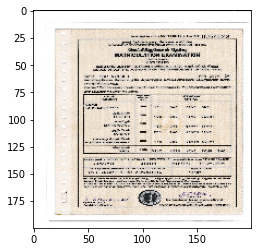

Marksheet


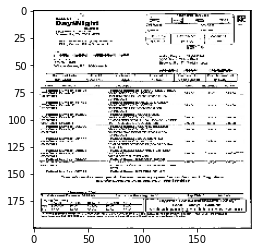

Invoice


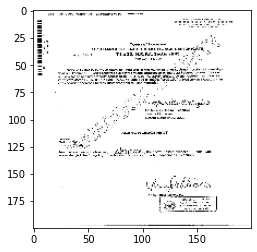

Discharge


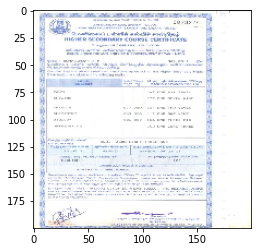

Marksheet


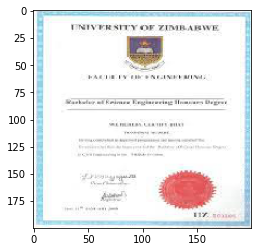

Invoice


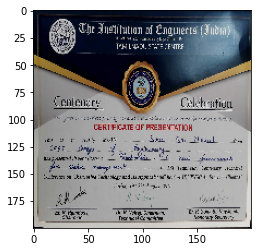

Degree_certificates


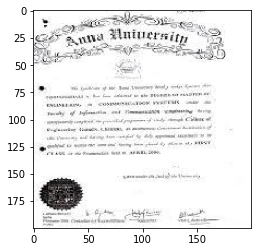

Degree_certificates


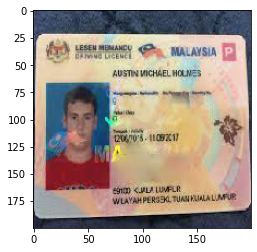

License


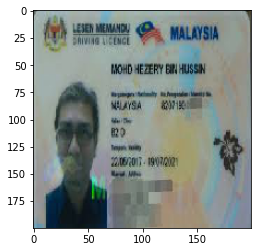

License


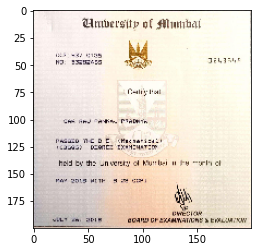

Marksheet


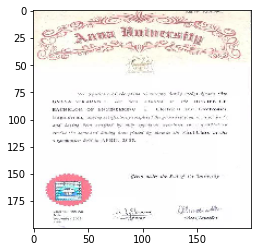

Marksheet


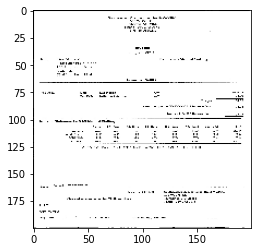

Invoice


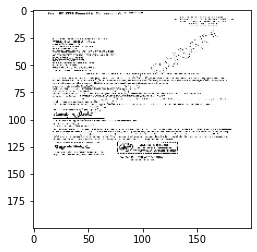

Discharge


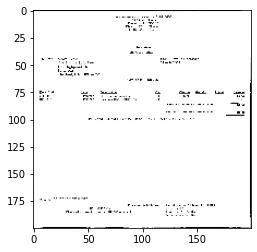

Invoice


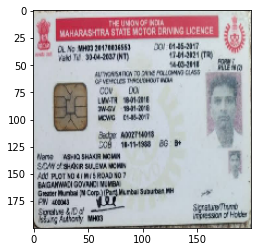

License


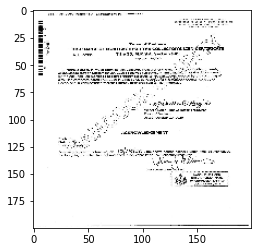

Discharge


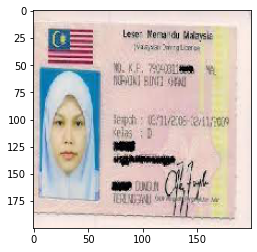

License


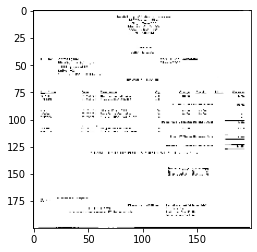

Invoice


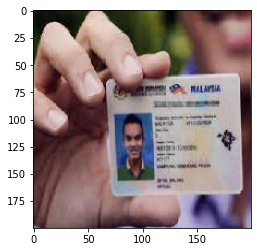

License


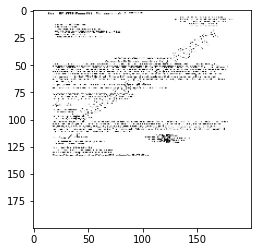

Discharge


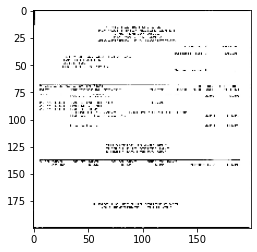

Invoice


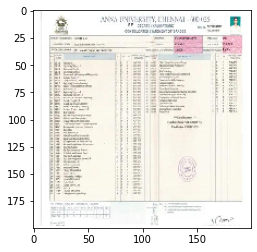

Marksheet


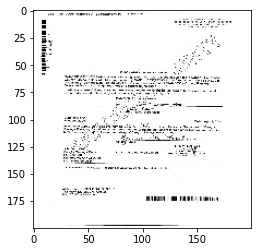

Discharge


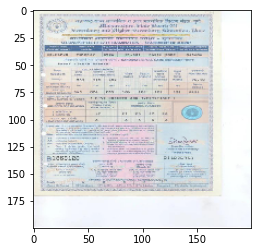

Marksheet


In [18]:
val_dir = '/home/vimalkumar/Documents/Classification/Validation'

for im in os.listdir(val_dir):
    img = image.load_img(val_dir + '//' + im , target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    val = model.predict(images)
    
    a=np.argmax(val,axis=1)
    
    for v in a:
        #print(v)
        print(dic[v])

# Predicting Single Image

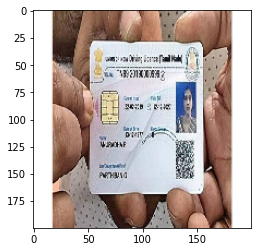

[[1.6601276e-20 7.2772858e-27 1.4098308e-26 1.0000000e+00 5.2370315e-21]]
License


In [17]:
img = image.load_img('/home/vimalkumar/Downloads/license.jpg', target_size=(200,200))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = x/255
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
val = model.predict(images)
print(val)
    
a=np.argmax(val,axis=1)
print(dic[a[0]])

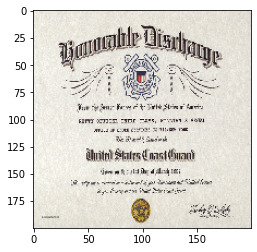

[[1.0000000e+00 1.3148063e-11 7.2073709e-17 4.7421772e-10 1.7225615e-10]]
Degree_certificates


In [15]:
img = image.load_img('/home/vimalkumar/Downloads/dc1.png', target_size=(200,200))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = x/255
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
val = model.predict(images)
print(val)  
a=np.argmax(val,axis=1)
#print(a)
print(dic[a[0]])